In [ ]:
#Car Insurance Claim Propensity

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data

HP = pd.read_csv(r"C:\Users\hppav\OneDrive\Desktop\swamy ECE\final_data.csv", header=0)

# Copy to back-up files

HP_bk = HP.copy()

# Display first 5 records

HP.head()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Manufacturer,RTO City,Policy Type,Marital Status,OCCUPATION,CITY,Facility Name,Ageny Num,Surveyor,Type Of Payment,Geography,IDV Value,Claim Element,Claim Created Date,Claim Status
0,2,7.0,9,66,80,Day-Shelton,Lake Johnview,Our own renewals,NOT KNOWN,Insurance broker,Stephanieview,Shaw and Sons,4089194,James Hunt,NaN,East Terri,274920.0,PARTIAL LOSS,2/22/2019 20:52,Rejected
1,3,6.0,7,87,84,Dennis LLC,Heidiburgh,NCB Transfer,NOT KNOWN,Pharmacologist,Juanberg,Jones PLC,58746732,Jason Jones,REIMBURSEMENT,Timothymouth,283000.0,NET OF SALVAGE,10/21/2018 8:20,Rejected
2,9,6.0,2,53,51,"Smith, Waters and Adams",East Linda,Our own renewals,NOT KNOWN,"Engineer, maintenance",Port Rachel,Campbell-Greene,88078634,Michael Zuniga,NaN,Sarahborough,283000.0,OWNER DRIVER:BODY INJURY,1/16/2019 7:45,Rejected
3,9,6.0,7,47,95,"Pierce, Smith and Reynolds",Newtonfurt,MTHF Renewal,NOT KNOWN,Electrical engineer,North Michaelburgh,"Banks, Collins and Miller",51769445,Kimberly Paul,NaN,Tammyland,260040.0,OWNER DRIVER:DEATH,12/14/2018 1:15,Rejected
4,6,3.0,2,99,58,Phillips PLC,Michaelburgh,Our own renewals,NOT KNOWN,Medical sales representative,Margaretfurt,Perkins-Manning,68919640,Carol Lane,CASHLESS,Port Christine,318840.0,OWNER DRIVER:DEATH,12-03-2018 04:11,Accepted


In [3]:
# Displaying the dataset information

HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Break In Period             5000 non-null   int64  
 1   Car Age Inception           4995 non-null   float64
 2   Claim Freq                  5000 non-null   int64  
 3   Claim loss_reported_period  5000 non-null   int64  
 4   Claim occ_cycle             5000 non-null   int64  
 5   Manufacturer                5000 non-null   object 
 6   RTO City                    5000 non-null   object 
 7   Policy Type                 5000 non-null   object 
 8   Marital Status              5000 non-null   object 
 9   OCCUPATION                  5000 non-null   object 
 10  CITY                        5000 non-null   object 
 11  Facility Name               5000 non-null   object 
 12  Ageny Num                   5000 non-null   int64  
 13  Surveyor                    5000 

In [5]:
##HP.rename(columns={'Ageny Num':'Ageny_Num'},inplace=True)

In [4]:
# Knowing any Duplicates are present or not
HP.duplicated().any()

False

In [6]:
# Display the null values in the dataset by count in each variable
HP.isnull().sum()

Break In Period                  0
Car Age Inception                5
Claim Freq                       0
Claim loss_reported_period       0
Claim occ_cycle                  0
Manufacturer                     0
RTO City                         0
Policy Type                      0
Marital Status                   0
OCCUPATION                       0
CITY                             0
Facility Name                    0
Ageny Num                        0
Surveyor                         0
Type Of Payment               1351
Geography                        0
IDV Value                        5
Claim Element                    0
Claim Created Date               0
Claim Status                     0
dtype: int64

In [7]:
#Removing null values in dataset
HP=HP.dropna()
HP.isnull().sum()

Break In Period               0
Car Age Inception             0
Claim Freq                    0
Claim loss_reported_period    0
Claim occ_cycle               0
Manufacturer                  0
RTO City                      0
Policy Type                   0
Marital Status                0
OCCUPATION                    0
CITY                          0
Facility Name                 0
Ageny Num                     0
Surveyor                      0
Type Of Payment               0
Geography                     0
IDV Value                     0
Claim Element                 0
Claim Created Date            0
Claim Status                  0
dtype: int64

In [8]:
#Knowing data type
HP.dtypes

Break In Period                 int64
Car Age Inception             float64
Claim Freq                      int64
Claim loss_reported_period      int64
Claim occ_cycle                 int64
Manufacturer                   object
RTO City                       object
Policy Type                    object
Marital Status                 object
OCCUPATION                     object
CITY                           object
Facility Name                  object
Ageny Num                       int64
Surveyor                       object
Type Of Payment                object
Geography                      object
IDV Value                     float64
Claim Element                  object
Claim Created Date             object
Claim Status                   object
dtype: object

In [9]:
# Identify the categorical variables

cat_vars = HP.columns[HP.dtypes == 'object']
print(cat_vars)

Index(['Manufacturer', 'RTO City', 'Policy Type', 'Marital Status',
       'OCCUPATION', 'CITY', 'Facility Name', 'Surveyor', 'Type Of Payment',
       'Geography', 'Claim Element', 'Claim Created Date', 'Claim Status'],
      dtype='object')


In [9]:
#knowing the columns  counts  
HP['Claim Status'].value_counts()

Accepted     1843
 Rejected    1801
Name: Claim Status, dtype: int64

In [10]:
#identifying the columns that doesnt influence the result
remove=['Manufacturer',
 'RTO City',
 'OCCUPATION',
 'CITY',
 'Facility Name',
 'Ageny Num',
 'Surveyor',
 'Geography',
 'Claim Created Date']

In [11]:
# Removing the columns
HP.drop(columns=remove, inplace=True)

In [12]:
#Viewing no.of unique values
HP.nunique()

Break In Period                 10
Car Age Inception               17
Claim Freq                      10
Claim loss_reported_period     100
Claim occ_cycle                100
Policy Type                      4
Marital Status                   1
Type Of Payment                  3
IDV Value                     2752
Claim Element                    4
Claim Status                     2
dtype: int64

In [13]:
#Del method --Marital Status has only 1 unique value
del HP['Marital Status']

In [14]:
HP.dtypes

Break In Period                 int64
Car Age Inception             float64
Claim Freq                      int64
Claim loss_reported_period      int64
Claim occ_cycle                 int64
Policy Type                    object
Type Of Payment                object
IDV Value                     float64
Claim Element                  object
Claim Status                   object
dtype: object

In [15]:
# Convert float to integer value 
HP['Car Age Inception'] = HP['Car Age Inception'].astype(int)
HP['IDV Value'] = HP['IDV Value'].astype(int)

In [16]:
#label Enoding by default
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
HP['Policy Type']=le.fit_transform(HP['Policy Type'])
HP['Type Of Payment']=le.fit_transform(HP['Type Of Payment'])
HP['Claim Element']=le.fit_transform(HP['Claim Element'])
HP['Claim Status']=le.fit_transform(HP['Claim Status'])

In [17]:
HP.dtypes

Break In Period               int64
Car Age Inception             int32
Claim Freq                    int64
Claim loss_reported_period    int64
Claim occ_cycle               int64
Policy Type                   int32
Type Of Payment               int32
IDV Value                     int32
Claim Element                 int32
Claim Status                  int32
dtype: object

In [18]:
# Identify the independent and Target variables

IndepVar = []
for col in HP.columns:
    if col != 'Claim Status':
        IndepVar.append(col)

TargetVar = 'Claim Status'

x = HP[IndepVar]
y = HP[TargetVar]

<AxesSubplot:xlabel='Claim Status'>

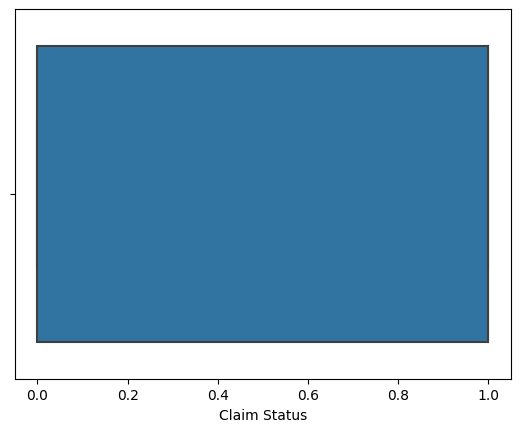

In [19]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HP["Claim Status"])
#NO outliers are present

In [20]:
# Split the data into train and test

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)

# Display the shape of the train_data and test_data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2550, 9), (1094, 9), (2550,), (1094,))

In [21]:
#scaling variable declaring an list
cols1=['IDV Value']

In [22]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

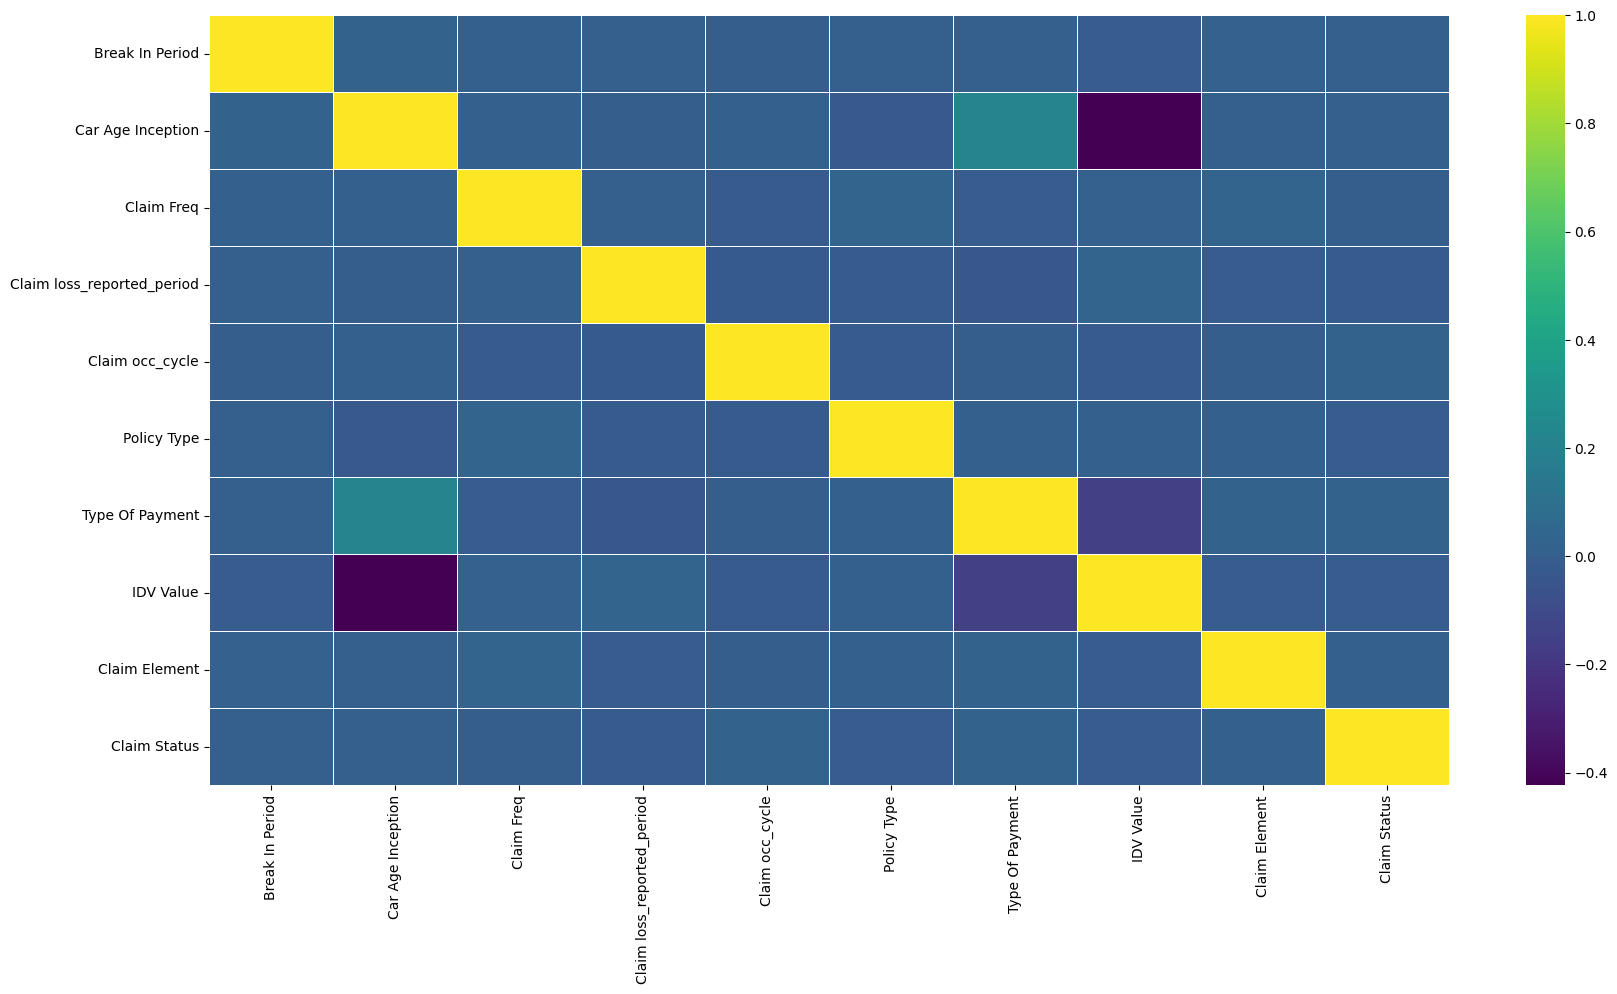

In [23]:
#Correlation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(HP.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap='viridis')
plt.show()

In [24]:
HP.corr()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Policy Type,Type Of Payment,IDV Value,Claim Element,Claim Status
Break In Period,1.000000,0.023867,0.006815,0.004583,-0.002955,0.004326,0.003581,-0.011452,0.010873,0.003032
Car Age Inception,0.023867,1.000000,0.007255,-0.005944,0.008907,-0.030220,0.221027,-0.423365,0.004580,-0.000016
Claim Freq,0.006815,0.007255,1.000000,0.004284,-0.020388,0.027117,-0.010151,0.013546,0.030359,-0.001451
Claim loss_reported_period,0.004583,-0.005944,0.004284,1.000000,-0.024119,-0.012756,-0.036683,0.030943,-0.009301,-0.016851
Claim occ_cycle,-0.002955,0.008907,-0.020388,-0.024119,1.000000,-0.012823,-0.004170,-0.021029,-0.002596,0.020519
Policy Type,0.004326,-0.030220,0.027117,-0.012756,-0.012823,1.000000,0.009946,0.008617,0.010004,-0.006691
Type Of Payment,0.003581,0.221027,-0.010151,-0.036683,-0.004170,0.009946,1.000000,-0.146751,0.019002,0.022072
IDV Value,-0.011452,-0.423365,0.013546,0.030943,-0.021029,0.008617,-0.146751,1.000000,-0.007526,-0.009309
Claim Element,0.010873,0.004580,0.030359,-0.009301,-0.002596,0.010004,0.019002,-0.007526,1.000000,0.007490
Claim Status,0.003032,-0.000016,-0.001451,-0.016851,0.020519,-0.006691,0.022072,-0.009309,0.007490,1.000000


In [25]:
HP.head()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Policy Type,Type Of Payment,IDV Value,Claim Element,Claim Status
1,3,6,7,87,84,0,2,283000,0,0
4,6,3,2,99,58,2,1,318840,2,1
5,1,1,0,2,14,1,1,523400,0,1
6,6,3,1,50,77,3,1,391757,1,0
7,2,2,2,53,73,1,1,662973,2,1


In [27]:
# Load the results dataset

EMResults = pd.read_csv(r"C:\Users\hppav\OneDrive\Desktop\DAYS ML INTERN\DAY 3\result file knn algorithms with knn result file\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[323 236]
 [331 204]]
Outcome values : 
 323 236 331 204
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.58      0.53       559
           0       0.46      0.38      0.42       535

    accuracy                           0.48      1094
   macro avg       0.48      0.48      0.48      1094
weighted avg       0.48      0.48      0.48      1094

Accuracy : 48.2 %
Precision : 49.4 %
Recall : 57.8 %
F1 Score : 0.533
Specificity or True Negative Rate : 38.1 %
Balanced Accuracy : 48.0 %
MCC : -0.042
roc_auc_score: 0.48


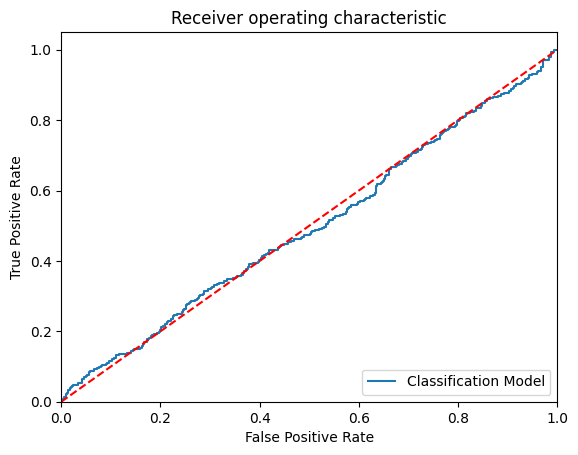

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[286 273]
 [297 238]]
Outcome values : 
 286 273 297 238
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.51      0.50       559
           0       0.47      0.44      0.46       535

    accuracy                           0.48      1094
   macro avg       0.48      0.48      0.48      1094
weighted avg       0.48      0.48      0.48      1094

Accuracy : 47.9 %
Precision : 49.1 %
Recall : 51.2 %
F1 Score : 0.501
Specificity or True Negative Rate : 44.5 %
Balanced Accuracy : 47.9 %
MCC : -0.044
roc_auc_score: 0.478


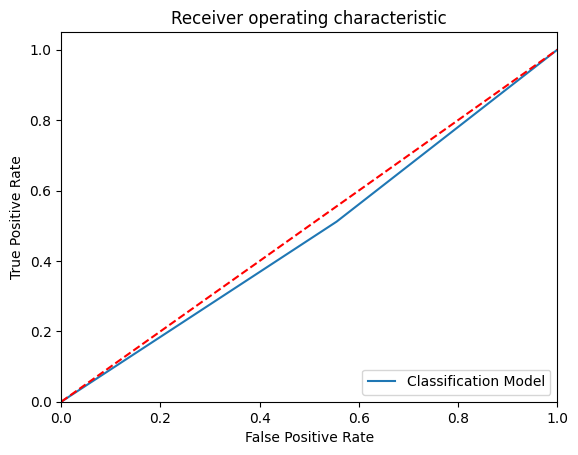

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[271 288]
 [271 264]]
Outcome values : 
 271 288 271 264
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.48      0.49       559
           0       0.48      0.49      0.49       535

    accuracy                           0.49      1094
   macro avg       0.49      0.49      0.49      1094
weighted avg       0.49      0.49      0.49      1094

Accuracy : 48.9 %
Precision : 50.0 %
Recall : 48.5 %
F1 Score : 0.492
Specificity or True Negative Rate : 49.3 %
Balanced Accuracy : 48.9 %
MCC : -0.022
roc_auc_score: 0.489


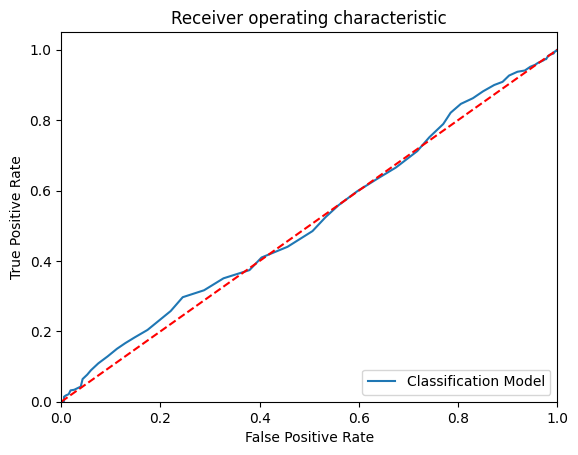

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[298 261]
 [267 268]]
Outcome values : 
 298 261 267 268
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.53      0.53       559
           0       0.51      0.50      0.50       535

    accuracy                           0.52      1094
   macro avg       0.52      0.52      0.52      1094
weighted avg       0.52      0.52      0.52      1094

Accuracy : 51.7 %
Precision : 52.7 %
Recall : 53.3 %
F1 Score : 0.53
Specificity or True Negative Rate : 50.1 %
Balanced Accuracy : 51.7 %
MCC : 0.034
roc_auc_score: 0.517


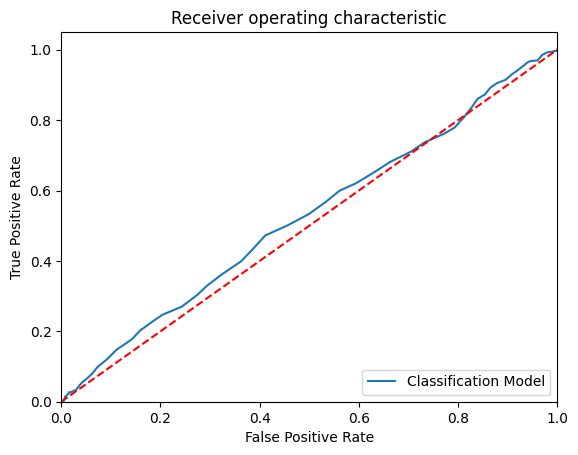

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[273 286]
 [286 249]]
Outcome values : 
 273 286 286 249
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.49      0.49       559
           0       0.47      0.47      0.47       535

    accuracy                           0.48      1094
   macro avg       0.48      0.48      0.48      1094
weighted avg       0.48      0.48      0.48      1094

Accuracy : 47.7 %
Precision : 48.8 %
Recall : 48.8 %
F1 Score : 0.488
Specificity or True Negative Rate : 46.5 %
Balanced Accuracy : 47.7 %
MCC : -0.046
roc_auc_score: 0.477


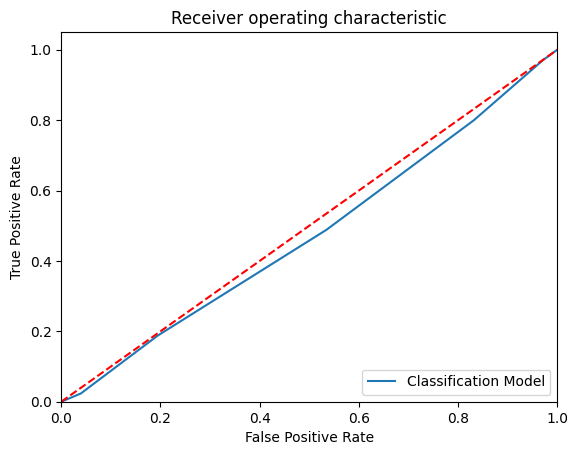

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[287 272]
 [299 236]]
Outcome values : 
 287 272 299 236
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.51      0.50       559
           0       0.46      0.44      0.45       535

    accuracy                           0.48      1094
   macro avg       0.48      0.48      0.48      1094
weighted avg       0.48      0.48      0.48      1094

Accuracy : 47.8 %
Precision : 49.0 %
Recall : 51.3 %
F1 Score : 0.501
Specificity or True Negative Rate : 44.1 %
Balanced Accuracy : 47.7 %
MCC : -0.046
roc_auc_score: 0.477


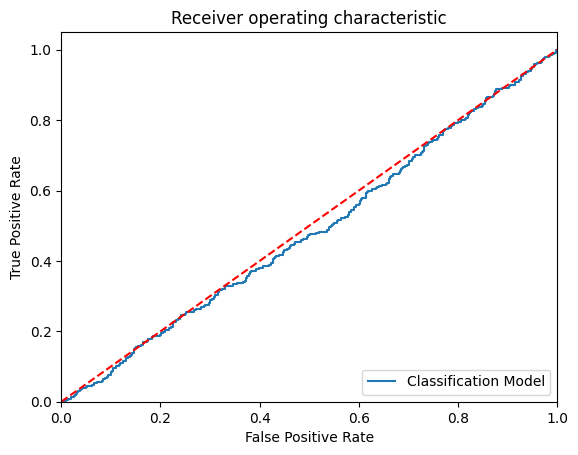

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[288 271]
 [245 290]]
Outcome values : 
 288 271 245 290
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.52      0.53       559
           0       0.52      0.54      0.53       535

    accuracy                           0.53      1094
   macro avg       0.53      0.53      0.53      1094
weighted avg       0.53      0.53      0.53      1094

Accuracy : 52.8 %
Precision : 54.0 %
Recall : 51.5 %
F1 Score : 0.527
Specificity or True Negative Rate : 54.2 %
Balanced Accuracy : 52.8 %
MCC : 0.057
roc_auc_score: 0.529


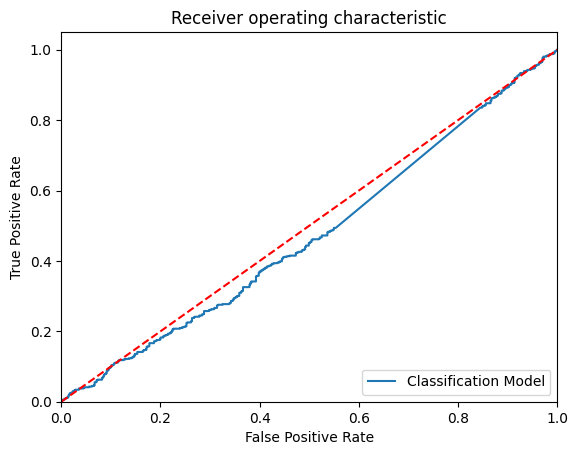

-----------------------------------------------------------------------------------------------------


In [27]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
for models in MM:
    
    # Fit the model
    models.fit(x_train,y_train)
    
    # Prediction
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    print('Model Name: ', models)
    
    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values
    actual = y_test

    # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [28]:
# Results with comparing the all the algorithms 

EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),323,236,331,204,0.482,0.494,0.578,0.533,0.381,-0.042,0.479563,0.480
1,DecisionTreeClassifier(),286,273,297,238,0.479,0.491,0.512,0.501,0.445,-0.044,0.478244,0.479
2,"(DecisionTreeClassifier(max_features='auto', r...",271,288,271,264,0.489,0.500,0.485,0.492,0.493,-0.022,0.489126,0.489
3,"(ExtraTreeClassifier(random_state=1033605125),...",298,261,267,268,0.517,0.527,0.533,0.530,0.501,0.034,0.517015,0.517
4,KNeighborsClassifier(),273,286,286,249,0.477,0.488,0.488,0.488,0.465,-0.046,0.476896,0.477
5,GaussianNB(),287,272,299,236,0.478,0.490,0.513,0.501,0.441,-0.046,0.477269,0.477
6,SVC(probability=True),288,271,245,290,0.528,0.540,0.515,0.527,0.542,0.057,0.528631,0.528


In [ ]:
# Here all machine learning model fail because Rejected and Accepted equally distributed across all feature.